# Code lié à l'analyse de données sur les élections de 2022.

Partie 1 : Analyse Descriptive 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# On creer 3 variables, une variable pour chaque tours et une comprenant les deux tours.

votes_globaux = pd.read_excel('election_France_2022.xlsx', index_col='Régions')

votesT1 = votes_globaux.iloc[:, 0:12]

votesT2 = votes_globaux.iloc[:, 12:14]

# On affiche les têtes de chaque dataset pour voir si tout est bon

print(votes_globaux.head(), votesT1.head(), votesT2.head())

                         Emmanuel_MACRON_T1  Éric_ZEMMOUR_T1  \
Régions                                                        
Auvergne-Rhône-Alpes                1174972           312881   
Bourgogne-Franche-Comté              394119           107057   
Bretagne                             647172            96984   
Centre-Val de Loire                  383851            88575   
Corse                                 26705            18856   

                         Fabien_ROUSSEL_T1  Jean_LASSALLE_T1  \
Régions                                                        
Auvergne-Rhône-Alpes                 96403            136414   
Bourgogne-Franche-Comté              33932             49557   
Bretagne                             51193             58653   
Centre-Val de Loire                  33590             38659   
Corse                                 4537             15330   

                         Jean-Luc_MÉLENCHON_T1  Nicolas_DUPONT-AIGNAN_T1  \
Régions                   

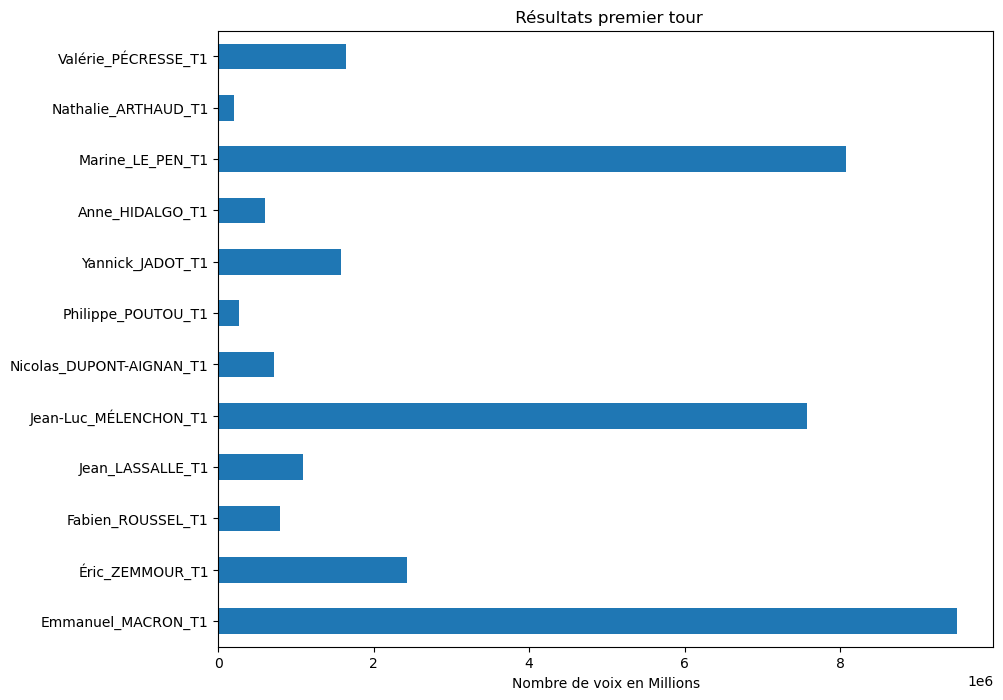

In [4]:
# On va commencer ici par une analyse du premier tour

totalT1 = votesT1.sum()

plt.figure(figsize=(10, 8))

totalT1.plot(kind='barh') 

plt.title(" Résultats premier tour")
plt.xlabel("Nombre de voix en Millions")
plt.show()

# GRAPHIQUE 1

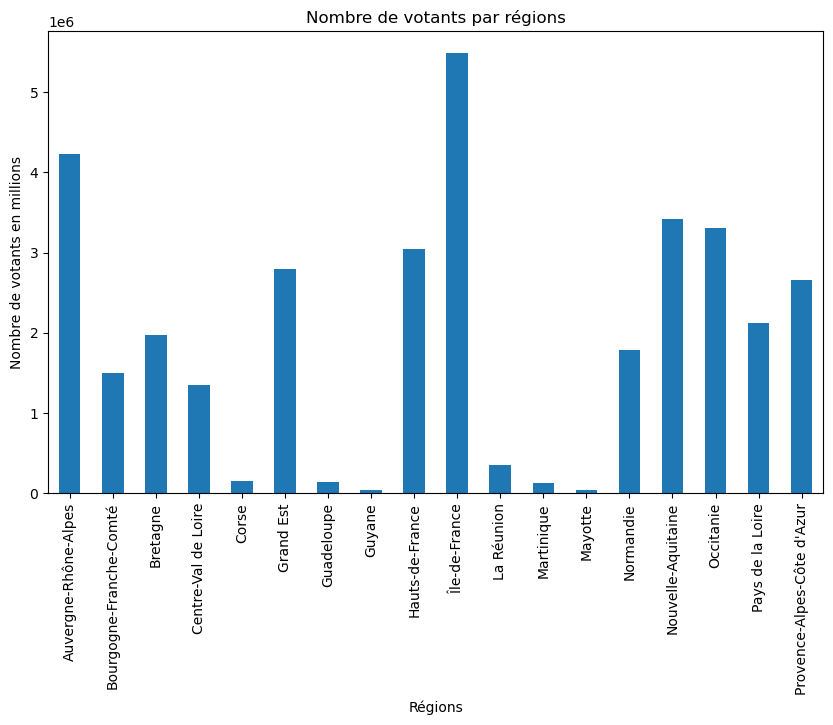

In [5]:
# On regarde le nombre de votants par région

regions = votesT1.sum(axis=1)

plt.figure(figsize=(10, 6))
regions.plot(kind='bar')
plt.title("Nombre de votants par régions")
plt.ylabel("Nombre de votants en millions")
plt.show()

# GRAPHIQUE 2

In [6]:
# On divise le nombre de voix par les nombres de voix totales afin de pouvoir comparer les regions indépendamment du nombre d'habitants
votesT1_pct = votesT1.div(votesT1.sum(axis=1), axis=0) * 100
votesT1_pct

,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1
Régions,,,,,,,,,,,,
Auvergne-Rhône-Alpes,27.754374,7.390658,2.277165,3.222277,21.196556,2.325423,0.722481,5.307944,1.832210,22.277774,0.546503,5.146634
Bourgogne-Franche-Comté,26.314704,7.148027,2.265586,3.308843,18.555011,2.583337,0.850496,4.021796,1.772234,27.351217,0.710616,5.118133
Bretagne,32.792810,4.914270,2.593997,2.972002,20.649774,1.779361,1.009010,6.191887,2.209050,19.528223,0.656949,4.702668
Centre-Val de Loire,28.533316,6.584165,2.496891,2.873692,18.677176,2.360785,0.834477,4.043863,1.721732,25.856834,0.688039,5.329030
Corse,18.120810,12.794832,3.078604,10.402247,13.366175,1.756779,0.929620,3.247564,1.074152,28.592270,0.308064,6.328882
Grand Est,27.284536,7.168195,1.697478,2.771941,17.625822,2.681630,0.796120,4.007375,1.432880,29.538021,0.667759,4.328243
Guadeloupe,13.426361,2.293371,0.494503,0.764704,56.158715,1.564941,0.527816,1.426509,1.677462,17.917607,0.802458,2.945553
Guyane,14.224366,4.386381,0.685982,1.438889,50.592566,1.999387,1.288308,2.621232,1.491871,17.662642,0.828198,2.780179
Hauts-de-France,25.399007,5.898105,3.115658,2.054192,18.984255,1.820754,0.694461,3.128413,1.341716,33.340127,0.688478,3.534833


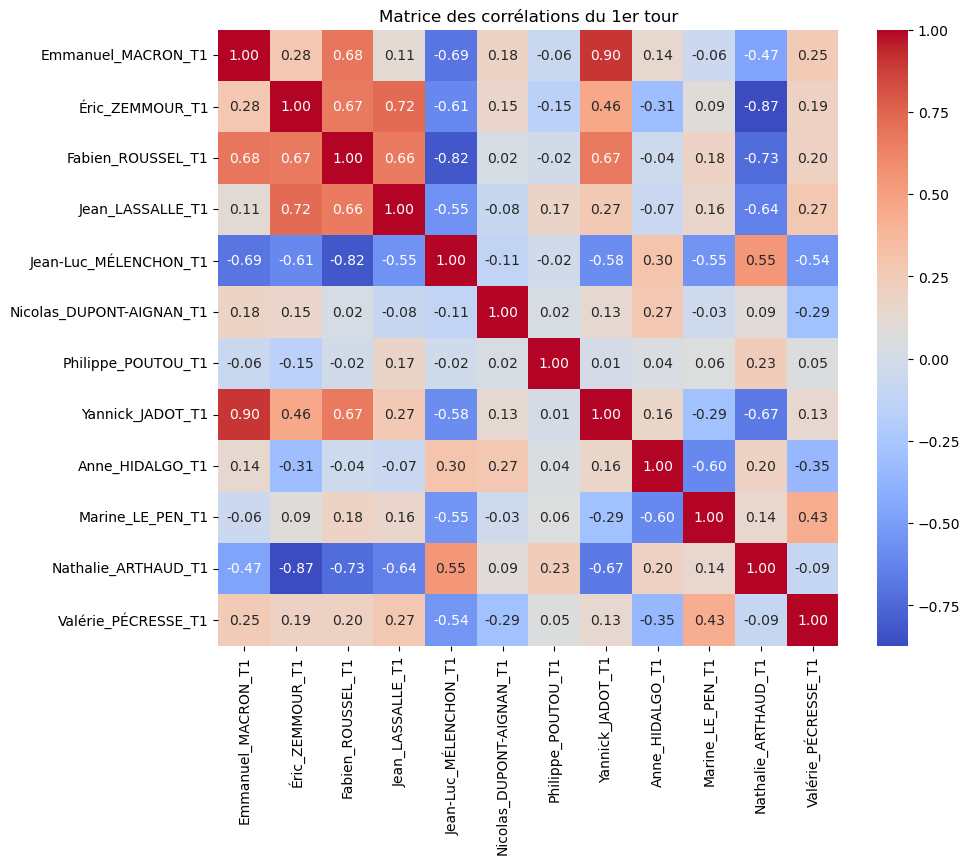

In [7]:
# On regarde ensuite les corrélations entre chaque candidat.

plt.figure(figsize=(10, 8))
sns.heatmap(votesT1_pct.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice des corrélations du 1er tour")
plt.show()

# GRAPHIQUE 3

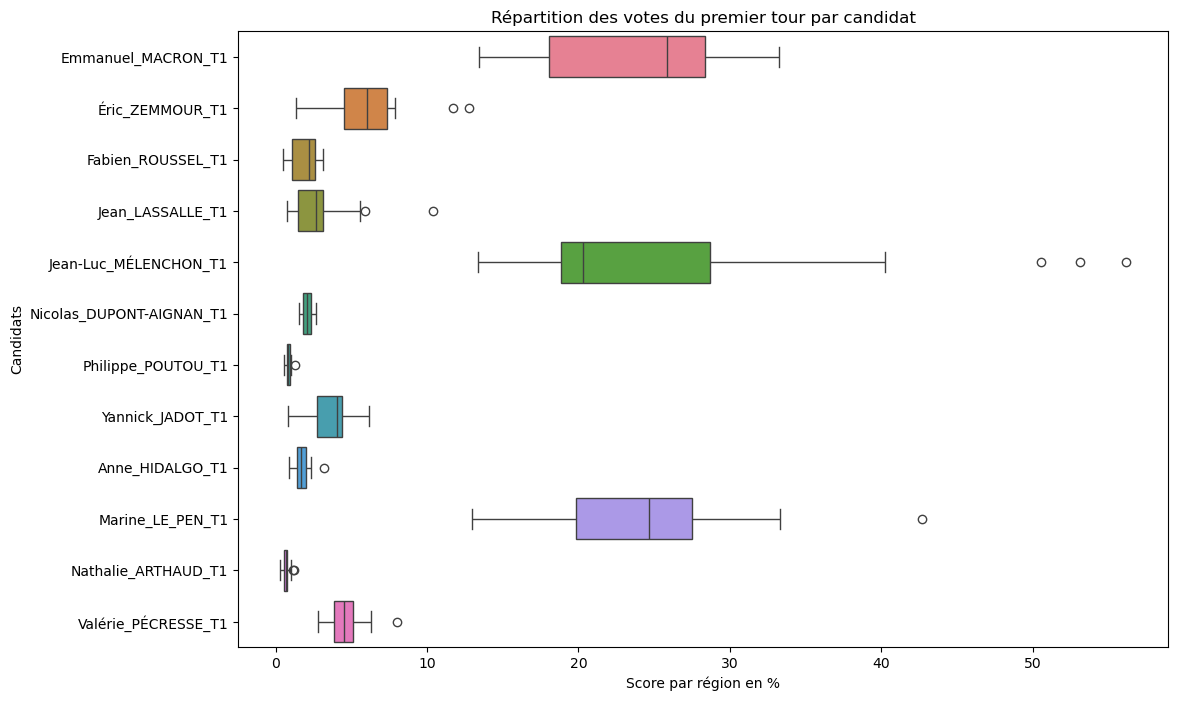

In [8]:
# On utilise les boxplots pour mesurer si les votes sont bien répartis entre les régions.

plt.figure(figsize=(12, 8))
sns.boxplot(data=votesT1_pct, orient='h')
plt.title("Répartition des votes du premier tour par candidat")
plt.xlabel("Score par région en %")
plt.ylabel("Candidats")
plt.show()

# GRAPHIQUE 4

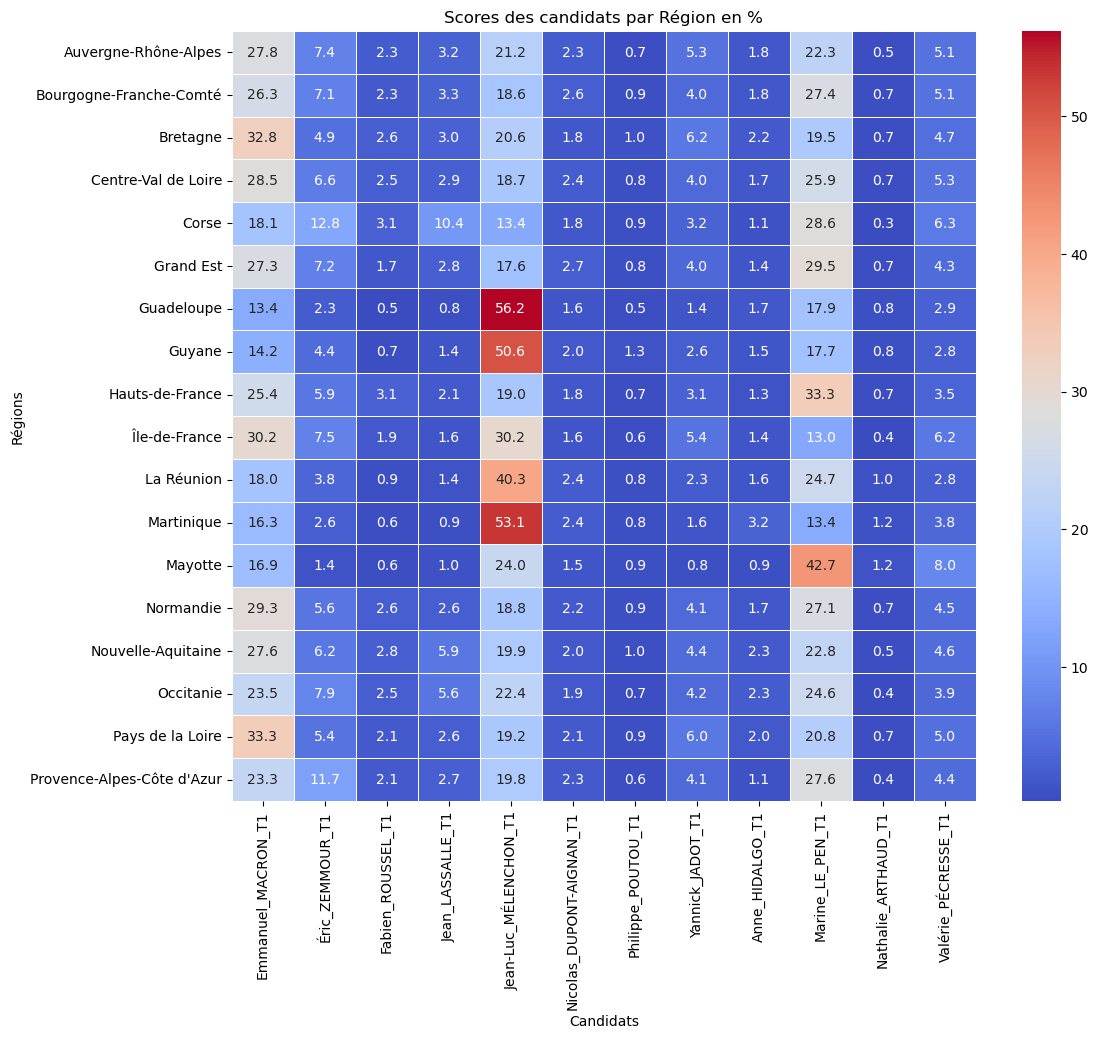

In [9]:
# On va maintenant visualiser le score des candidats par région pour comparer:

plt.figure(figsize=(12, 10))
sns.heatmap(votesT1_pct, cmap='coolwarm', annot=True, linewidths=.5, fmt=".1f")
plt.title("Scores des candidats par Région en %")
plt.xlabel("Candidats")
plt.ylabel("Régions")
plt.show()

# GRAPHIQUE 5

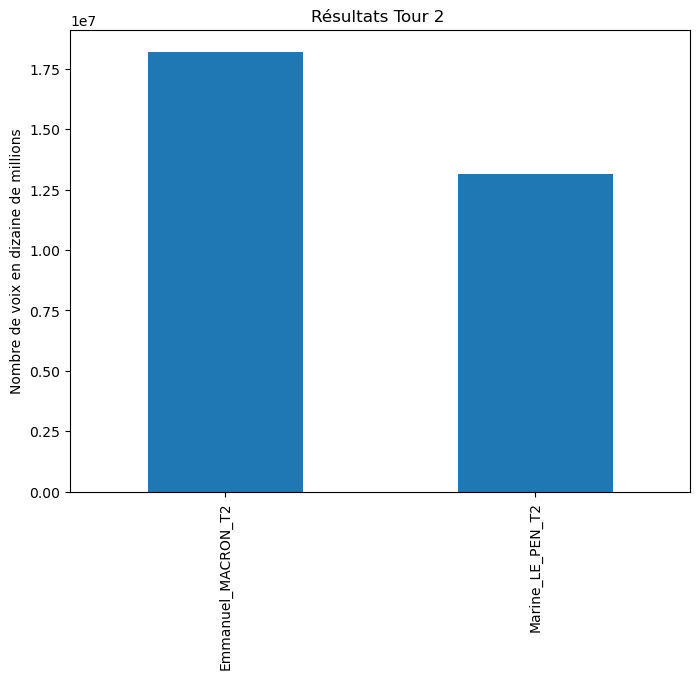

In [9]:
# On passe à une analyse du second tour:

totalT2 = votesT2.sum()

plt.figure(figsize=(8, 6))
totalT2.plot(kind='bar')
plt.title("Résultats Tour 2 ")
plt.ylabel("Nombre de voix en dizaine de millions")
plt.show()

# GRAPHIQUE 6

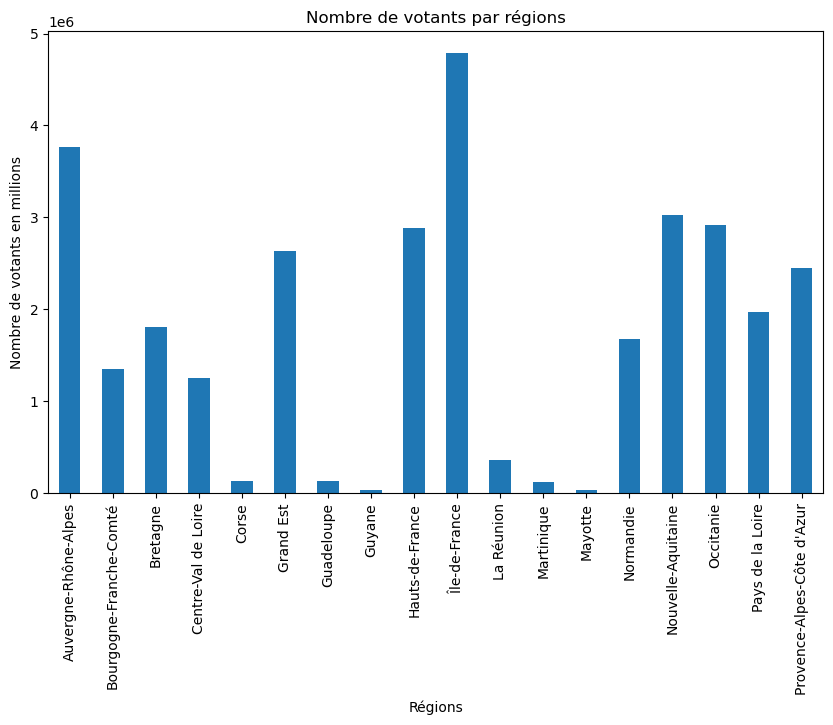

In [10]:
# Comme pour le premier tour on regarde le nombre de votes par région:

regions2 = votesT2.sum(axis=1)

plt.figure(figsize=(10, 6))
regions2.plot(kind='bar')
plt.title("Nombre de votants par régions")
plt.ylabel("Nombre de votants en millions")
plt.show()

# GRAPHIQUE 7

In [11]:
# On regarde le vote par région en % pour Macron et Lepen :
votesT2_pct = votesT2.div(votesT2.sum(axis=1), axis=0) * 100

votesT2_pct

,Emmanuel_MACRON_T2,Marine_LE_PEN_T2
Régions,,
Auvergne-Rhône-Alpes,59.764451,40.235549
Bourgogne-Franche-Comté,52.881779,47.118221
Bretagne,66.581451,33.418549
Centre-Val de Loire,56.444489,43.555511
Corse,41.919501,58.080499
Grand Est,52.070443,47.929557
Guadeloupe,30.399365,69.600635
Guyane,39.222024,60.777976
Hauts-de-France,47.859987,52.140013


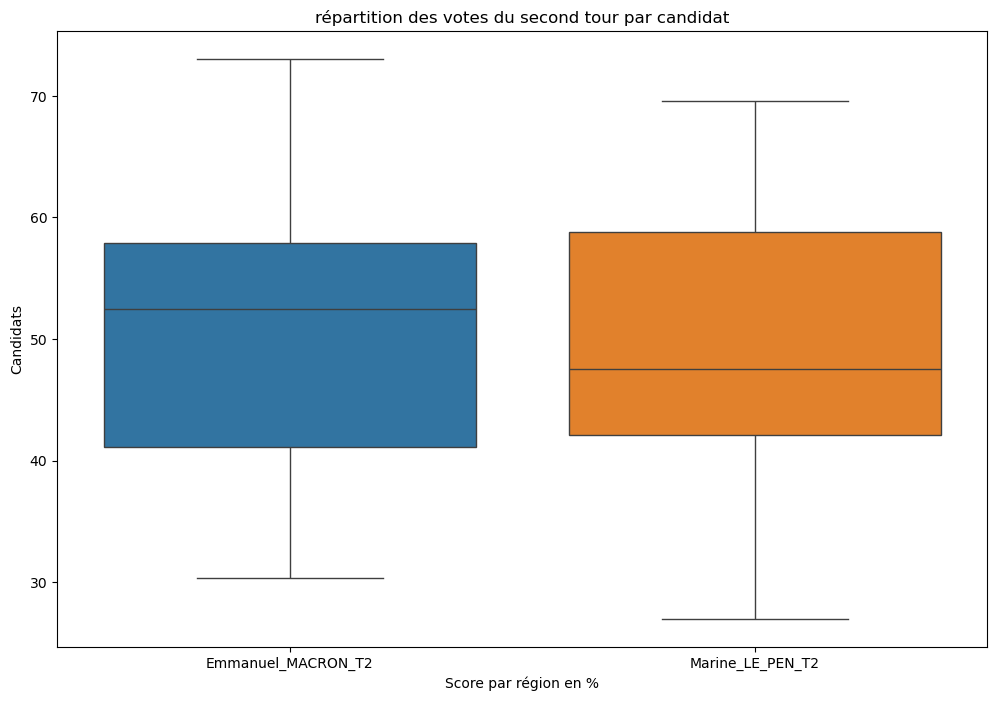

In [12]:
# On regarde ensuite la répartition des votes du second tour pour chacun des candidats :

plt.figure(figsize=(12, 8))
sns.boxplot(data=votesT2_pct)
plt.title("Répartition des votes du second tour par candidat")
plt.xlabel("Score par région en %")
plt.ylabel("Candidats")
plt.show()

#GRAPHIQUE 8

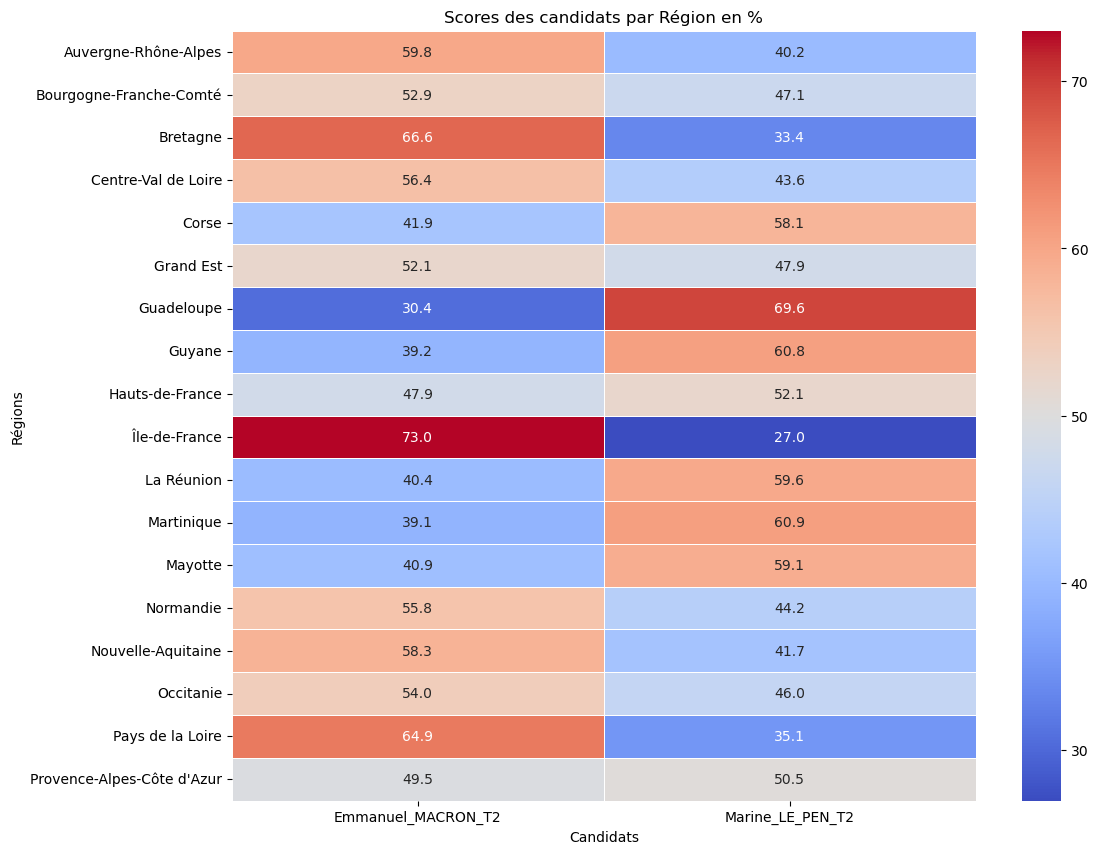

In [13]:
# On regarde le score des candidats par région en % :

plt.figure(figsize=(12, 10))
sns.heatmap(votesT2_pct, cmap='coolwarm', annot=True, linewidths=.5, fmt=".1f")
plt.title("Scores des candidats par Région en %")
plt.xlabel("Candidats")
plt.ylabel("Régions")
plt.show()

#GRAPHIQUE 9

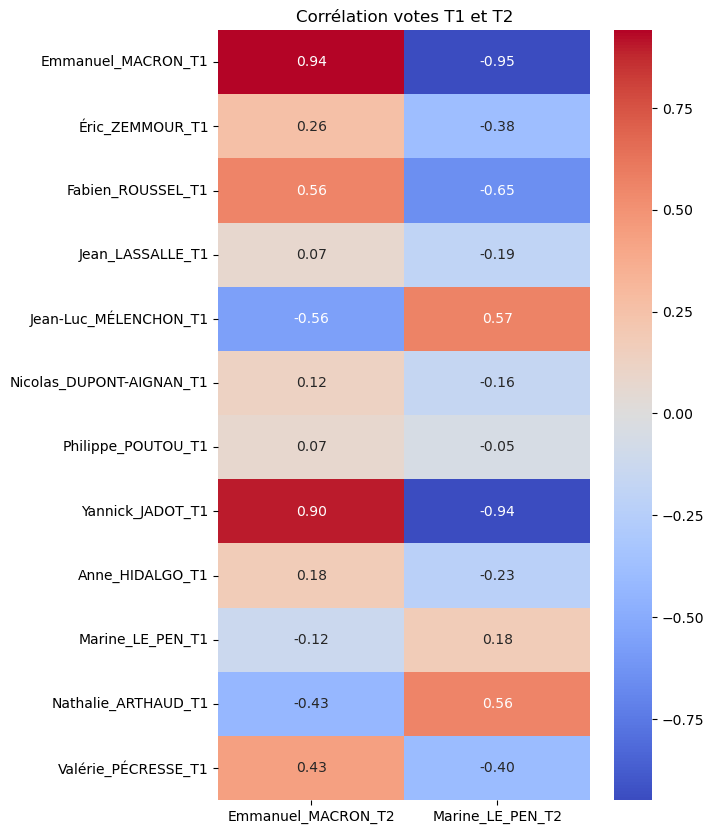

In [10]:
votes_pct = votes_globaux.div(votes_globaux.sum(axis=1), axis=0) * 100

# On veut voir les correlations entre les votes du premier tour et du second tour

# On regarde les correlations dans notre fichier global contenant le premier tour et second tour
corr = votes_pct.corr()

# On creer une variable dans laquelle on extrait en ligne le premier tour et en colonne le second tour
corrT1T2 = corr.iloc[0:12, 12:14]


plt.figure(figsize=(6, 10)) 
sns.heatmap(corrT1T2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation votes T1 et T2")
plt.show()

# GRAPHIQUE 10

Partie 2 : Analyse Factorielle des Correspondances (AFC)

Après avoir réaliser une analyse descriptive de nos données, on va vouloir utiliser une méthode d'analyse
très utile dans notre cas pour étudier plus en détail nos données et leurs liens (car on a 2 variables qualitatives plusieurs modalités => régions et candidats, et des effectifs => nombres de votes, sous la forme d'un tableau de contingence) : l'AFC.

Elle va nous permettre d'une part de synthétiser et de réduire l'information de notre tableau à un niveau ou on va pouvoir interpréter plus facilement (via la formation d'axes principales qui sont des combinaisons linéaires des colonnes ou des lignes qui sont chosies pour maximiser l'inertie des données), et d'autre part, dans notre cas, de pouvoir trouver et visualiser les possibles liens entre les régions et les candidats qui ont été votés (voir des sous groupes similaires dans leurs résultats).

1) Ici, comme vu précédamment, il est pertinent de réaliser une AFC car nous avons en données un tableau de contingence avec 2 variables qualitatives avec de nombreuses modalités (et donc beaucoup de dimensions), et en addition les données du tableau sont des effectifs (chaque case représentnat le nombre de votes pour une région et un candidat en particulier).

Tout ceci est parfait pour une AFC qui va permettre de mieux synthétiser et visualiser l'information et les liens entre les différentes profils lignes et colonnes en réduisant les dimensions de notre tableau sous forme d'axes principales et donc de graphiques en 2 dimensions.

De plus, on a vu dans la 1ère partie d'analyse descriptive qu'on voit apparaitre des liens de corrélations entre les différentes modalités (notamment une séparation géographique assez nette entre les différents blocs de votants).

Il est donc pertinent de réaliser l'AFC pour mieux identifier et analyser les correspondances qu'on  
a vu dans la 1ère partie entre certaines régions et candidats et de mettre en évidence des sous groupes 
de régions ou de candidats avec les mêmes profils.

In [ ]:
# 1.1) Manipulations à faire au préalable : 

In [ ]:
# Le module fanalysis doit être installé ! (pip install fanalysis)

In [15]:
# Importation bibliothèque :
import numpy as np

# Test de Chi2
from scipy.stats import chi2_contingency

# Analyse factorielle des correspondance (AFC)
from fanalysis.ca import CA

In [16]:
# Dataframes initiaux :

votes_globaux = pd.read_excel("election_France_2022.xlsx", sheet_name=0, index_col=0)

votesT1 = votes_globaux.filter(like="_T1")

votesT2 = votes_globaux.filter(like="_T2")

# On se concentrera sur le dataframe votesT1

In [17]:
# Visualisation et vérification des dataframes :
votes_globaux.head()

,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1,Emmanuel_MACRON_T2,Marine_LE_PEN_T2
Régions,,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,1174972,312881,96403,136414,897349,98446,30586,224710,77566,943122,23136,217881,2251392,1515717
Bourgogne-Franche-Comté,394119,107057,33932,49557,277901,38691,12738,60235,26543,409643,10643,76655,713977,636161
Bretagne,647172,96984,51193,58653,407527,35116,19913,122198,43596,385393,12965,92808,1202202,603409
Centre-Val de Loire,383851,88575,33590,38659,251259,31759,11226,54401,23162,347845,9256,71690,705704,544558
Corse,26705,18856,4537,15330,19698,2589,1370,4786,1583,42137,454,9327,56095,77721


In [17]:
votesT1.head()

,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1
Régions,,,,,,,,,,,,
Auvergne-Rhône-Alpes,1174972,312881,96403,136414,897349,98446,30586,224710,77566,943122,23136,217881
Bourgogne-Franche-Comté,394119,107057,33932,49557,277901,38691,12738,60235,26543,409643,10643,76655
Bretagne,647172,96984,51193,58653,407527,35116,19913,122198,43596,385393,12965,92808
Centre-Val de Loire,383851,88575,33590,38659,251259,31759,11226,54401,23162,347845,9256,71690
Corse,26705,18856,4537,15330,19698,2589,1370,4786,1583,42137,454,9327


In [18]:
votesT2.head()

,Emmanuel_MACRON_T2,Marine_LE_PEN_T2
Régions,,
Auvergne-Rhône-Alpes,2251392,1515717
Bourgogne-Franche-Comté,713977,636161
Bretagne,1202202,603409
Centre-Val de Loire,705704,544558
Corse,56095,77721


In [ ]:
# 1.2) Test du Khi-Deux :

Le 1er tour et le 2e tour n’ont pas la même structure politique, donc pour les prochains tests, on séparera le 1er et 2ème tour. Si on ne le faisait pas, l'interprétation serait faussé car les colonnes d’un tableau utilisé en khi-deux/AFC doivent représenter une même variable catégorielle, mesurée dans un même cadre.

Ici, si on prend le dataframe global, on décrirait pas une mais deux variables différentes pour les colonnes : 
choix au tour 1 et choix au tour 2, ce qui est contre productif.

On vérifie tout de même la pertinence de l'AFC avec le test du Khi-Deux, qui est une étape préalable fondamental pour le calcul des axes et la vérification de l'utilité de l'application de l'AFC sur nos données.

Il vérifie si les variables qualitatives (lignes et colonnes d’un tableau de contingence) sont indépendantes ou associées.

Si les variables sont indépendantes (hypothèse H0) → aucune structure particulière à explorer, l’AFC n’apporterait pas d’information pertinentes.

Si les variables sont dépendantes (hypothèse H1) → il existe des liens entre les modalités, et l’AFC devient pertinente pour les visualiser et les interpréter dans un espace réduit.

On réalisera l'AFC que sur les données du 1er tour, pourquoi ?

Le second tour ne comporte que deux candidats, ce qui limite la dimension maximale de l’analyse factorielle des correspondances à un seul axe. 
Explication : dimension max de l'AFC = min(nb lignes−1, nb colonnes−1) = min(17, 1) = 1 =) 1 seul axe.

L’AFC n’apporte donc pas de représentation factorielle bidimensionnelle interprétable. Pour cette raison, l’analyse factorielle est réalisée uniquement sur les résultats du premier tour, plus riches en modalités.'

In [19]:
# Effectuer le test du chi2 pour les votes du 1er tour

## La fonction 'chi2_contingency'  effectue le test du Chi2 pour vérifier l'indépendance entre les variables dans un tableau de contingence renvoie plusieurs valeurs, mais nous nous intéressons
## principalement à la statistique de test (chi2_stat) et à la valeur p (p_value).

## chi2_stat : C'est la statistique de test Chi2, qui mesure la différence entre les fréquences observées et attendues.
## p_value : C'est la valeur p associée à la statistique Chi2. Elle indique la probabilité d'observer les données si l'hypothèse nulle (d'indépendance) est vraie

chi2, p_valeur, ddl, expected = chi2_contingency(votesT1)

# Calcul de l'inertie totale
n = votesT1.values.sum()
inertie_totale = chi2 / n

# Afficher les résultats du test du chi2
print(f"Test du Chi2 Statistique : {chi2}")
print(f"Inertie totale : {inertie_totale}")
print(f"Valeur de p : {p_valeur}")

# alpha : la probabilité maximale d'accepter à tort l'hypothèse nulle (H0) d'indépendance entre les variables.
alpha = 0.05

if p_valeur < alpha:
    print("Les variables sont liées (on rejète l'hypothèse nulle H0)")
else:
    print("Les variables sont indépendantes (on accepte l'hypothèse nulle H0)")

Test du Chi2 Statistique : 1698812.576223261
Inertie totale : 0.04925945151402277
Valeur de p : 0.0
Les variables sont liées (on rejète l'hypothèse nulle H0)


=> Conclusion : Statistique chie 2 très élevée (donc grosses différences entre données réelles et données attendues si 0 indépendance entre les variables) et p value extrèmement faible ou nulle =) On accepte H1, on peut passer a l'AFC.

In [ ]:
# 2) Réalisation AFC pour votes du 1er tour :

In [20]:
# 2.1) Application de l'AFC sur nos données du 1er tour :

AFC=CA(row_labels=votesT1.index.values,col_labels=votesT1.columns.values,stats=True)

AFC.fit(votesT1.values)

CA(col_labels=array(['Emmanuel_MACRON_T1', 'Éric_ZEMMOUR_T1', 'Fabien_ROUSSEL_T1',
       'Jean_LASSALLE_T1', 'Jean-Luc_MÉLENCHON_T1',
       'Nicolas_DUPONT-AIGNAN_T1', 'Philippe_POUTOU_T1',
       'Yannick_JADOT_T1', 'Anne_HIDALGO_T1', 'Marine_LE_PEN_T1',
       'Nathalie_ARTHAUD_T1', 'Valérie_PÉCRESSE_T1'], dtype=object),
   row_labels=array(['Auvergne-Rhône-Alpes', 'Bourgogne-Franche-Comté', 'Bretagne',
       'Centre-Val de Loire', 'Corse', 'Grand Est', 'Guadeloupe',
       'Guyane', 'Hauts-de-France', 'Île-de-France', 'La Réunion',
       'Martinique', 'Mayotte', 'Normandie', 'Nouvelle-Aquitaine',
       'Occitanie', 'Pays de la Loire', "Provence-Alpes-Côte d'Azur"],
      dtype=object))

[2.63882141e-02 9.16479375e-03 7.01468937e-03 5.01763150e-03
 8.27711256e-04 4.86882179e-04 1.54769326e-04 9.96300483e-05
 5.78922343e-05 4.25044719e-05 4.73327779e-06]


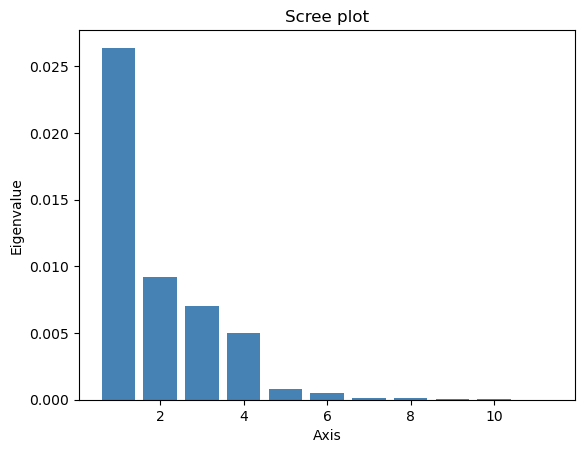

In [21]:
# 2.2) On affiche les valeurs propres liées à chaque axe principal :
# Valeur propre = l'inertie expliquée par une composante principale (plus la valeur est élevée, plus l'axe est important)

print(AFC.eig_[0]) 

# Représentation graphique des valeurs propres :

AFC.plot_eigenvalues()

[5.35698496e+01 1.86051478e+01 1.42402913e+01 1.01861294e+01
 1.68030953e+00 9.88403573e-01 3.14192141e-01 2.02255700e-01
 1.17525130e-01 8.62869369e-02 9.60887229e-03]
[ 53.56984963  72.17499741  86.41528867  96.60141812  98.28172765
  99.27013122  99.58432336  99.78657906  99.90410419  99.99039113
 100.        ]


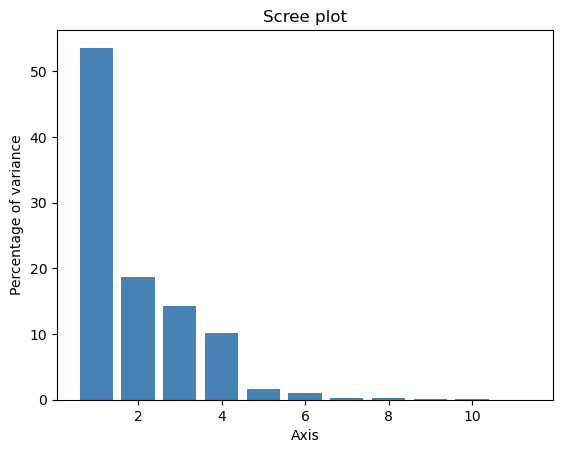

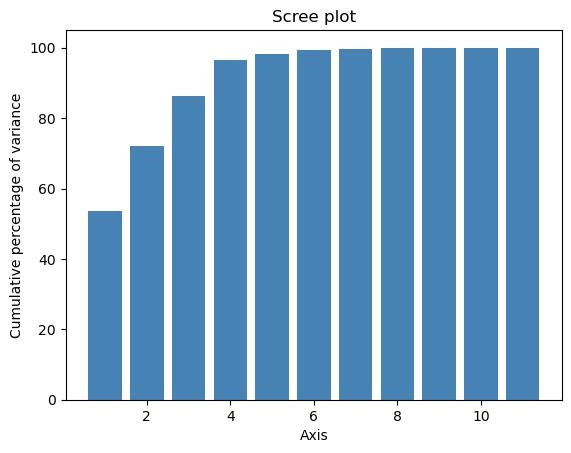

In [23]:
# 2.3) On représente graphiquement la variance expliquée des données par nos axes principales :

print(AFC.eig_[1]) #1 Pour variance simple
print(AFC.eig_[2]) #2 Pour variance cumulée
AFC.plot_eigenvalues(type='percentage')
AFC.plot_eigenvalues(type='cumulative')

Environ 72% de l'information est expliquée par les 2 premiers axes, ce qui est supérieur a 70%, donc on va se concentrer surleur étude, en étudiant à la fin de manière complémentaire l'axe 3 en annexe par acquis de conscience car il comporte tout de même une inertie assez conséquente.
Après l'axe 3, pas très intéréssant d'expliquer les autres (inertie trop faible, formation du coude sur le graphique).

Axe factoriel 1


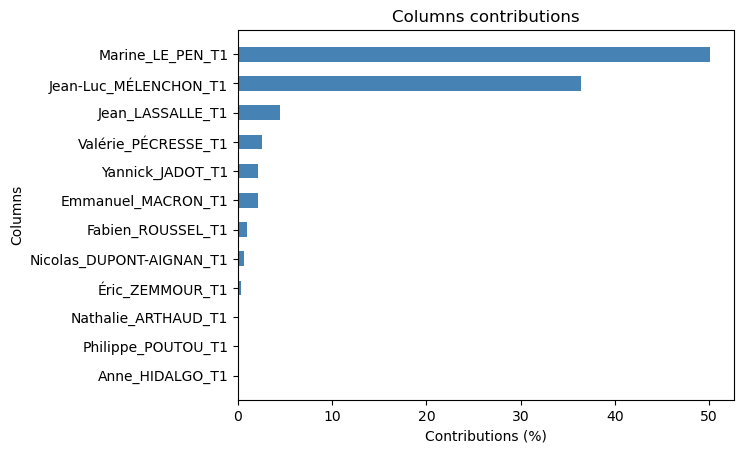

Axe factoriel 2


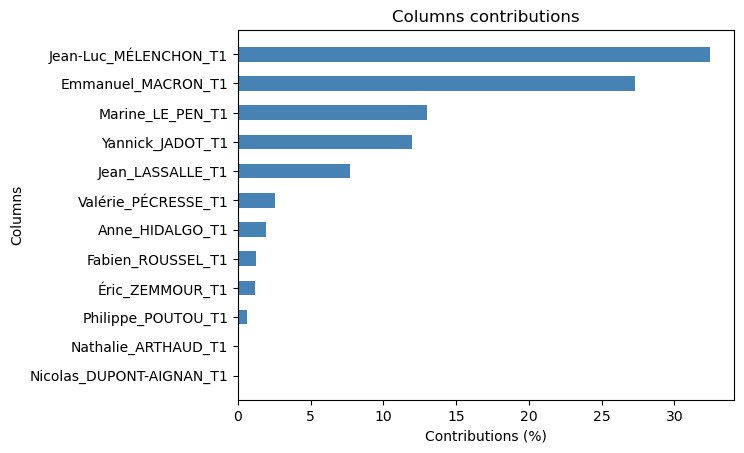

Axe factoriel 1


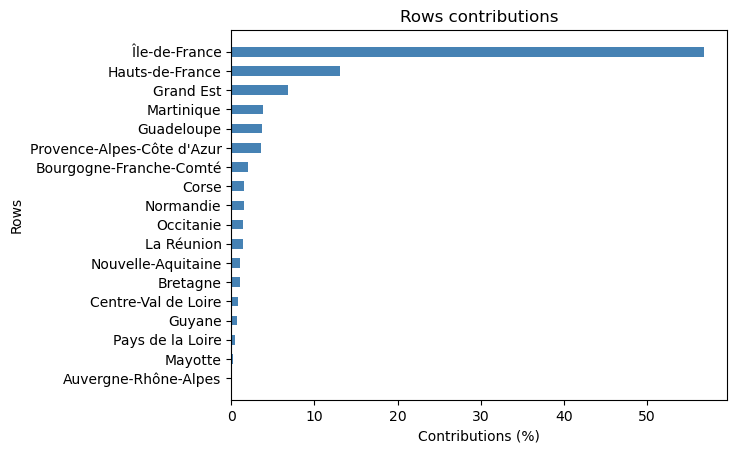

Axe factoriel 2


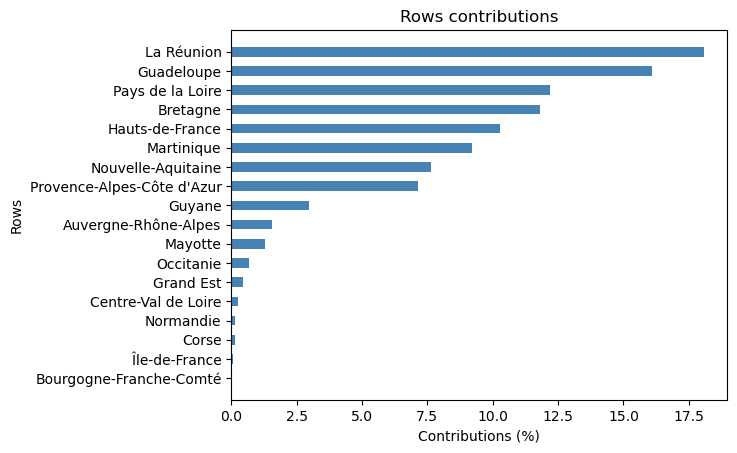

In [23]:
# 2.4) On affiche les graphiques représentant la contribution des lignes (régions) et des colonnes (candidats) à la formation des axes 1 et 2 :
# La contribution mesure la part d’inertie de l’axe due à une modalité.

print("Axe factoriel 1")
AFC.plot_col_contrib(num_axis=1)

print("Axe factoriel 2")
AFC.plot_col_contrib(num_axis=2)

print("Axe factoriel 1")
AFC.plot_row_contrib(num_axis=1)

print("Axe factoriel 2")
AFC.plot_row_contrib(num_axis=2)

2.5) On vérifie maintenant la représentation des modalités par rapport aux axes (si la modalité est bien représenté sur l'axe).

Interprétation : cos² proche de 1 → très bien représenté
                 cos² proche de 0 → mal représenté (projection trompeuse)

Si cos² est très faible, on ne vas pas interpréter la position du point sur les nuages de points par rapport à l'axe en question car pas assez fiable.

Axe factoriel 1


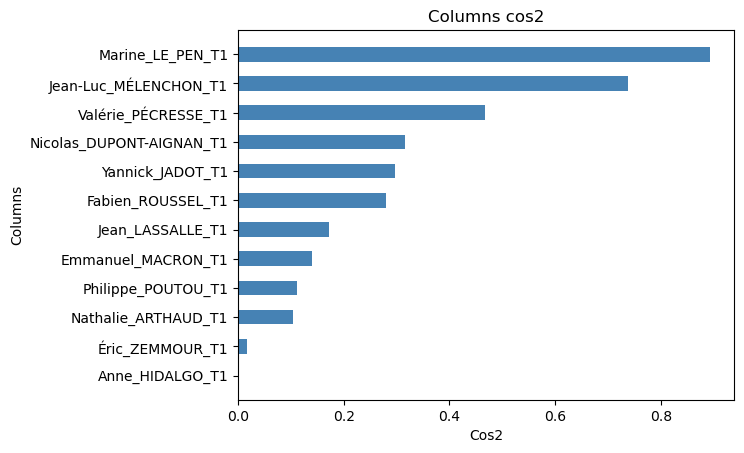

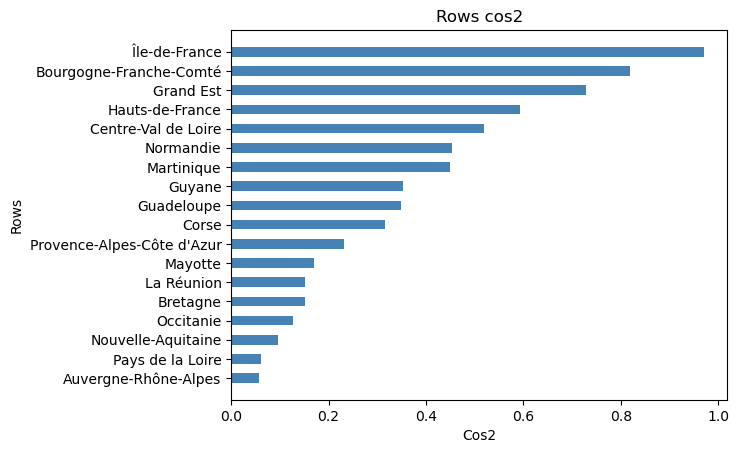

Axe factoriel 2


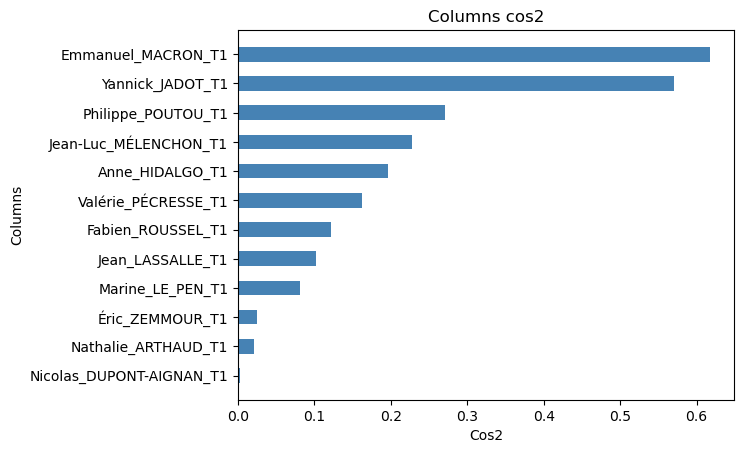

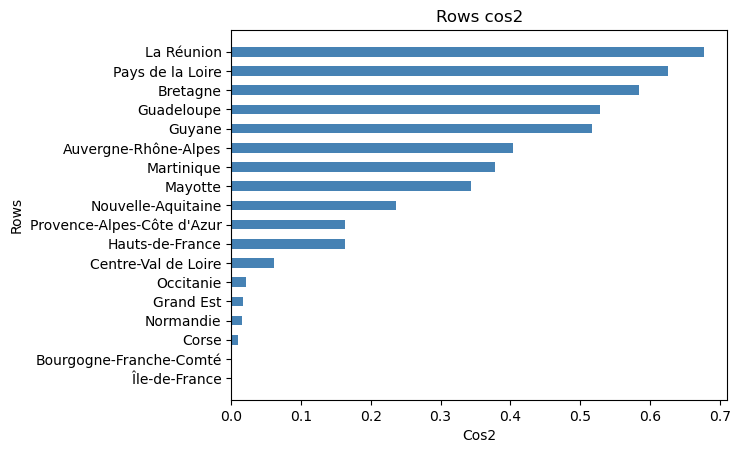

In [22]:
print("Axe factoriel 1")
AFC.plot_col_cos2(num_axis=1)
AFC.plot_row_cos2(num_axis=1)

print("Axe factoriel 2")
AFC.plot_col_cos2(num_axis=2)
AFC.plot_row_cos2(num_axis=2)

  3.1) Interprétation contributions et représentations pour chaque axe :

Axe 1 : Représente fortement des profils qui vont vers Jean Luc Mélenchon et Marine Lepen (très fortes contributions et cos2 élevés)et des votes se trouvant principalement dans la région d'Ile de France (idem très forte contribution et cos2 élevé)

On peut dire que cet axe représente des profils de votes qui globalement vont opposer les extrèmes.

Axe 2 : Représente fortement des profils qui vont vers Macron et Yannick Jadot (contributions et cos élevés =) bien représentés). Représente fortement des profils de régions des îles et de quelques régions de l'ouest de la France avec de fortes contributions et cos2 (Réunion, Guadeloupe, Martinique, Pays de la Loire, Bretagne)

In [ ]:
# 2.6) On affiche plusieurs nuages de points représentant graphiquement nos différentes modalités de régions et de candidats sur
# nos deux 1ers axes principales calculés via l'AFC :

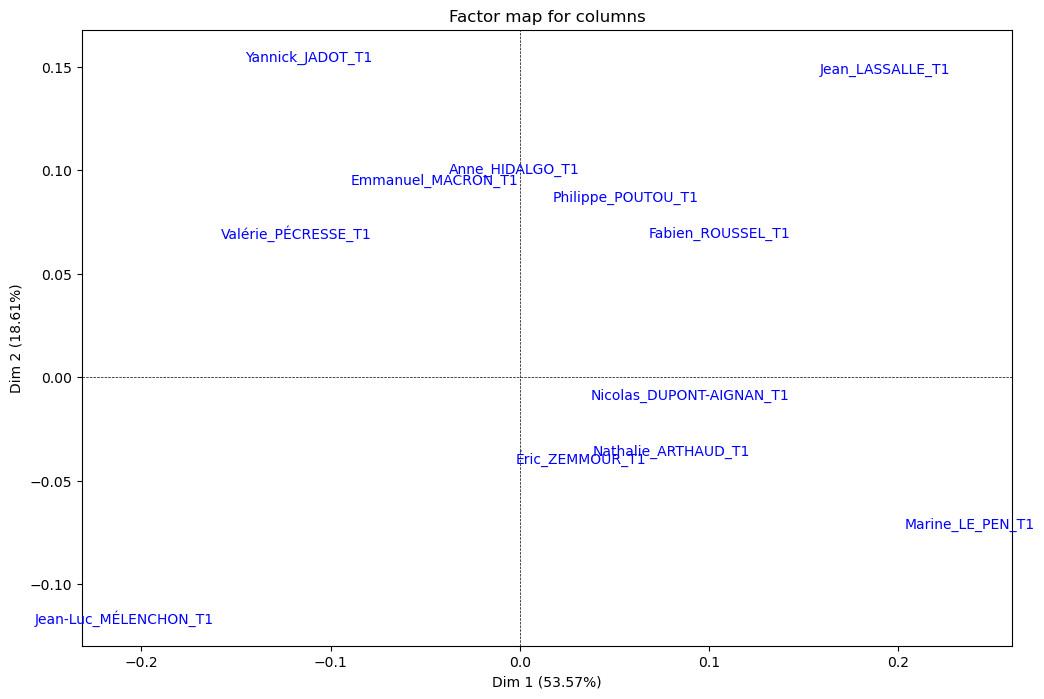

In [26]:
AFC.mapping_col(num_x_axis=1, num_y_axis=2, figsize=(12,8))

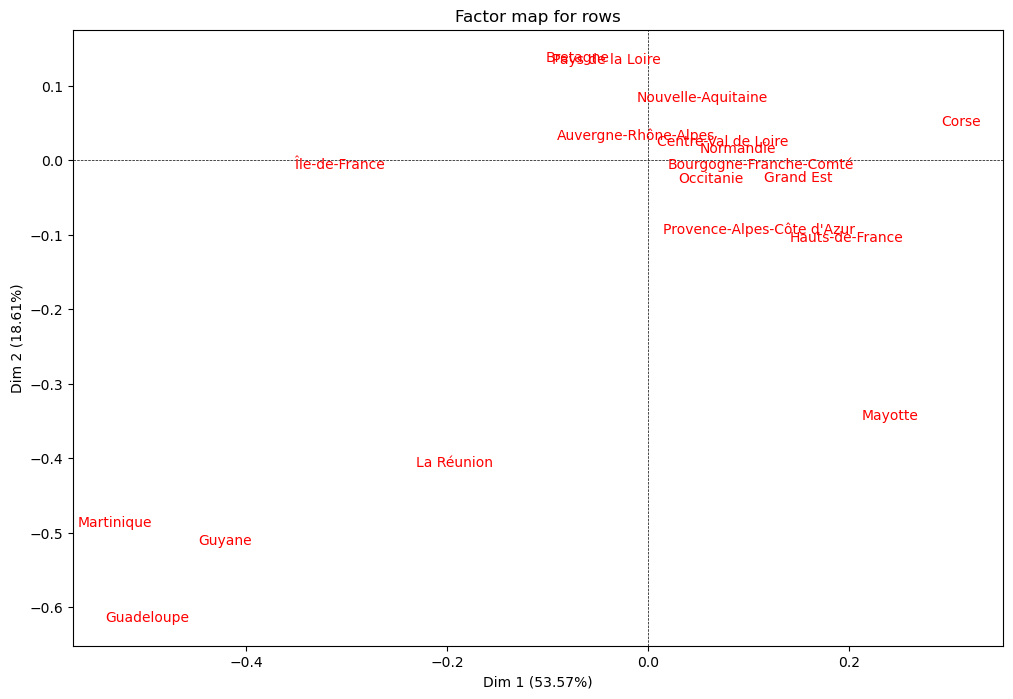

In [27]:
AFC.mapping_row(num_x_axis=1, num_y_axis=2, figsize=(12,8))

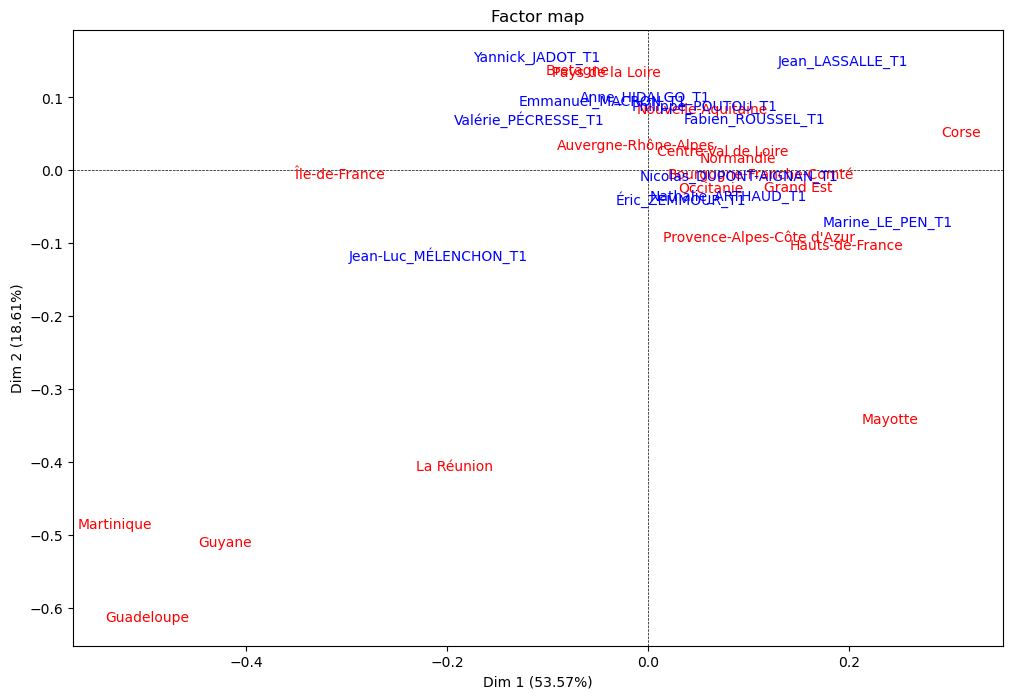

In [28]:
AFC.mapping(1,2,figsize=(12,8))

Lecture Nuage de point : Le plan factoriel formé par les axes 1 et 2 permet de résumer l’essentiel de la structure du tableau régions / candidats. 
Les régions proches sur le plan présentent des profils de vote similaires, tandis que celles qui sont éloignées ou opposées traduisent des différences marquées dans la répartition des votes. 

De même, la proximité entre une région et un candidat indique une sur-représentation relative de ce candidat dans la région concernée par rapport à l’ensemble national.

3.2) Interprétation nuages de points :

L’axe 1, qui explique la plus grande part de l’inertie (53.7%), oppose principalement deux profils régionaux très différents. 

D’un côté, on observe la candidature de Jean-Luc Mélenchon associée à la région Île-de-France, qui présentent des contributions et des cos² élevés, 
indiquant qu’ils structurent fortement cet axe et qu’ils sont bien représentés.

De l’autre côté de l’axe apparaît la candidature de Marine Le Pen, également très contributive mais située en opposition sur l’axe.

L’axe 2, qui explique une part moindre mais encore significative de l’inertie (18.61%), révèle une structuration complémentaire des données.

Il est principalement porté par les candidatures d’Emmanuel Macron et de Yannick Jadot, qui présentent une bonne qualité de représentation sur cet axe. Plusieurs régions d’outre-mer, telles que La Réunion, la Guadeloupe et la Martinique, ainsi que certaines régions de l’Ouest de la France comme la Bretagne et les Pays de la Loire, contribuent également fortement à cet axe. 

Pour conclure, on retrouve quasiment les mêmes conclusions que celles de notre analyse descriptive :

On a nos 3 favoris (Mélenchon, Lepen et Macron) qui sont surreprésentés dans certaines régions et ont des zones fortes.

Tandis que Mélenchon va avoir beaucoup de succès dans les térritoires ultramarins ainsi qu'en Ile de France, Lepen va avoir plus de succès et de voix dans d'autres régions dont certaines plus au Nord (Haut de France, Grand Est, Corse)

Macron, lui, à des zones fortes dans des pays comme la Bretagne et le pays de la Loire, et s'en sort bien dans la plupart des régions

In [ ]:
# 2.2) En annexe les graphiques représentant l'axe 3 et les nuages de points avec les axes 1 et 2 :

Axe factoriel 3


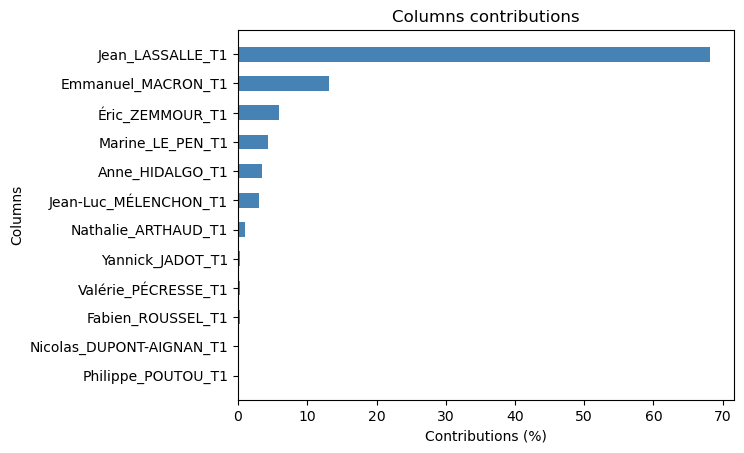

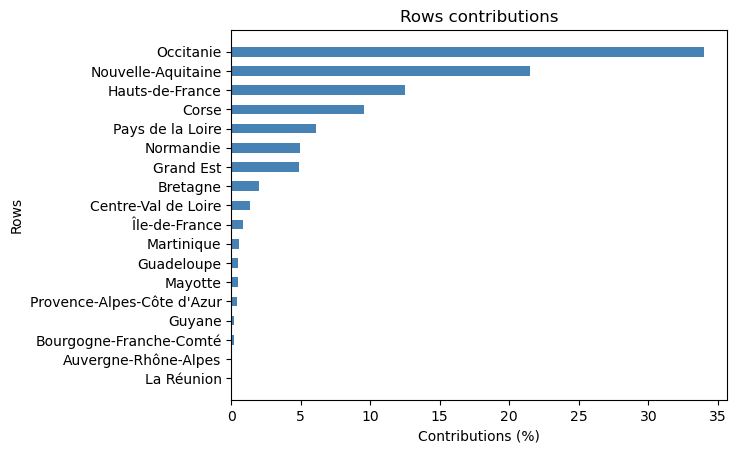

In [29]:
# Contribution des modalités des lignes et des colonnes à l'axe 3 :

print("Axe factoriel 3")
AFC.plot_col_contrib(num_axis=3)
AFC.plot_row_contrib(num_axis=3)

Axe factoriel 3


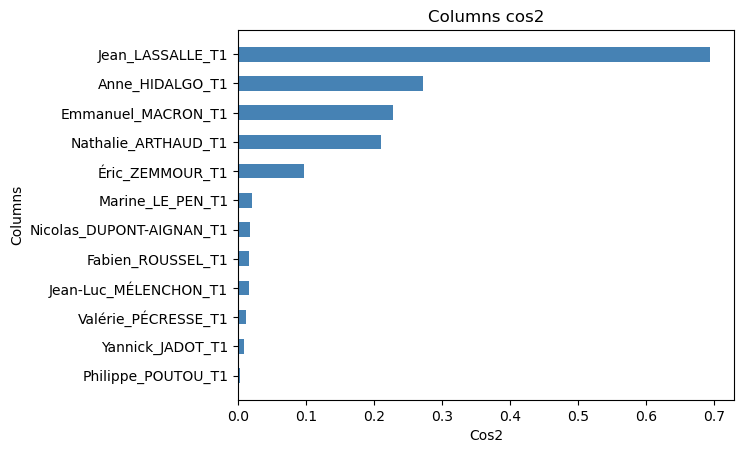

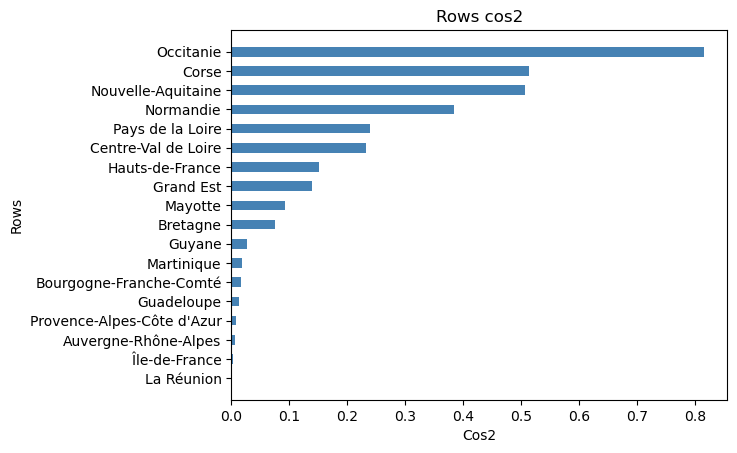

In [30]:
# Cosinus carrés des modalités pour l'axe 3 :
print("Axe factoriel 3")
AFC.plot_col_cos2(num_axis=3)
AFC.plot_row_cos2(num_axis=3)

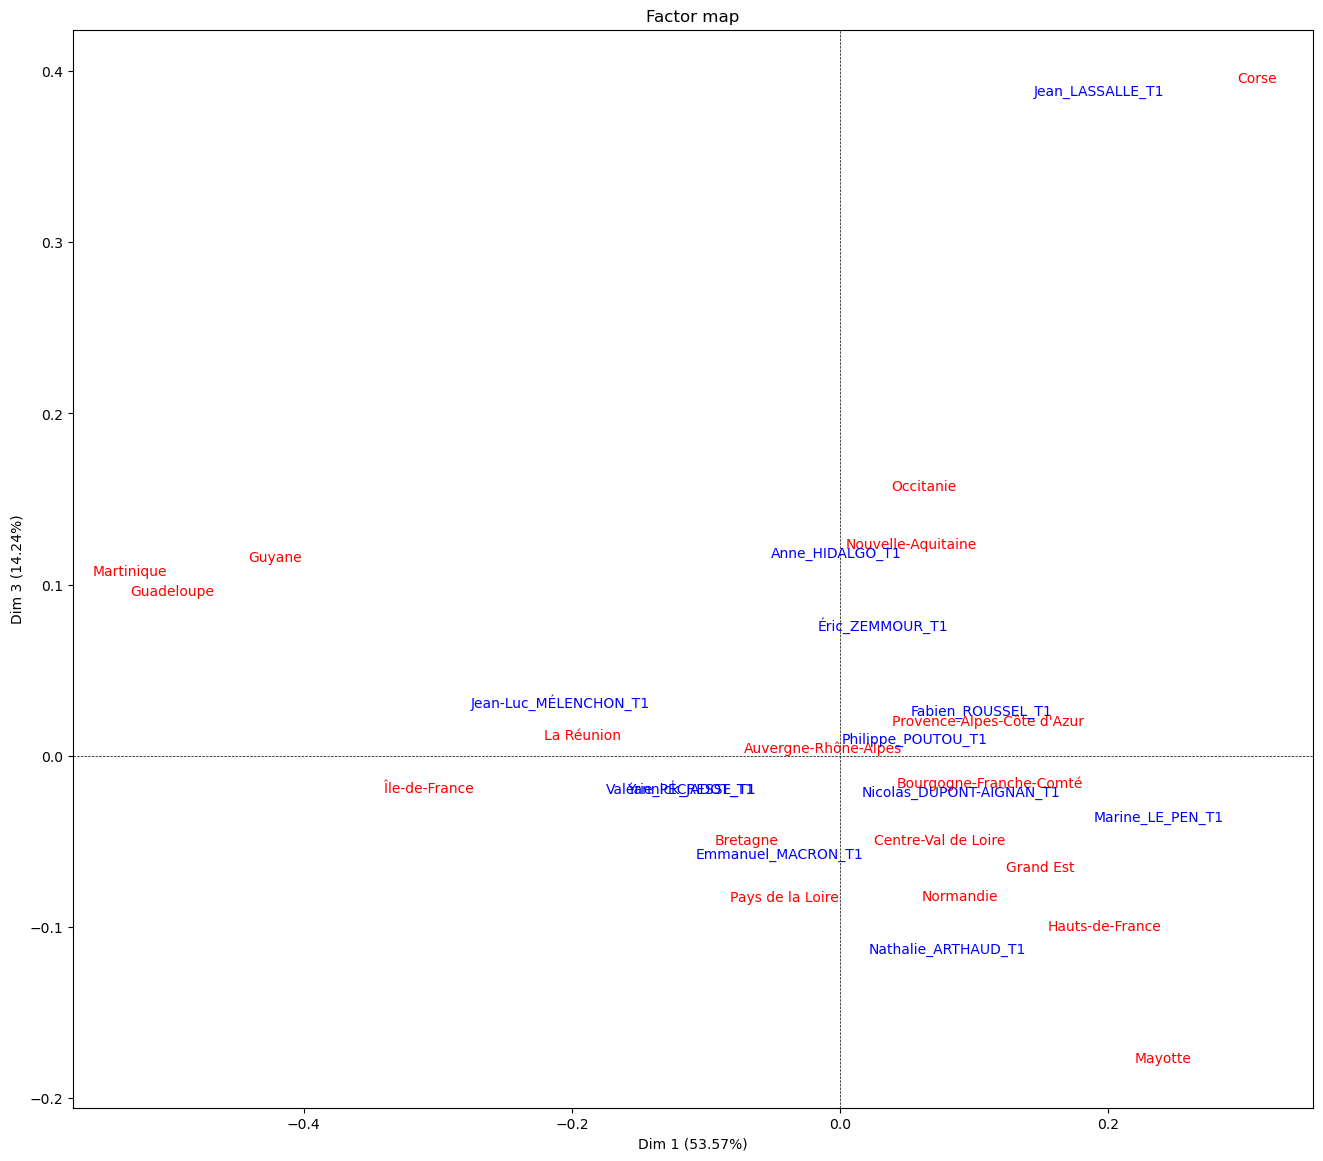

In [31]:
AFC.mapping(1,3,figsize=(16,14))

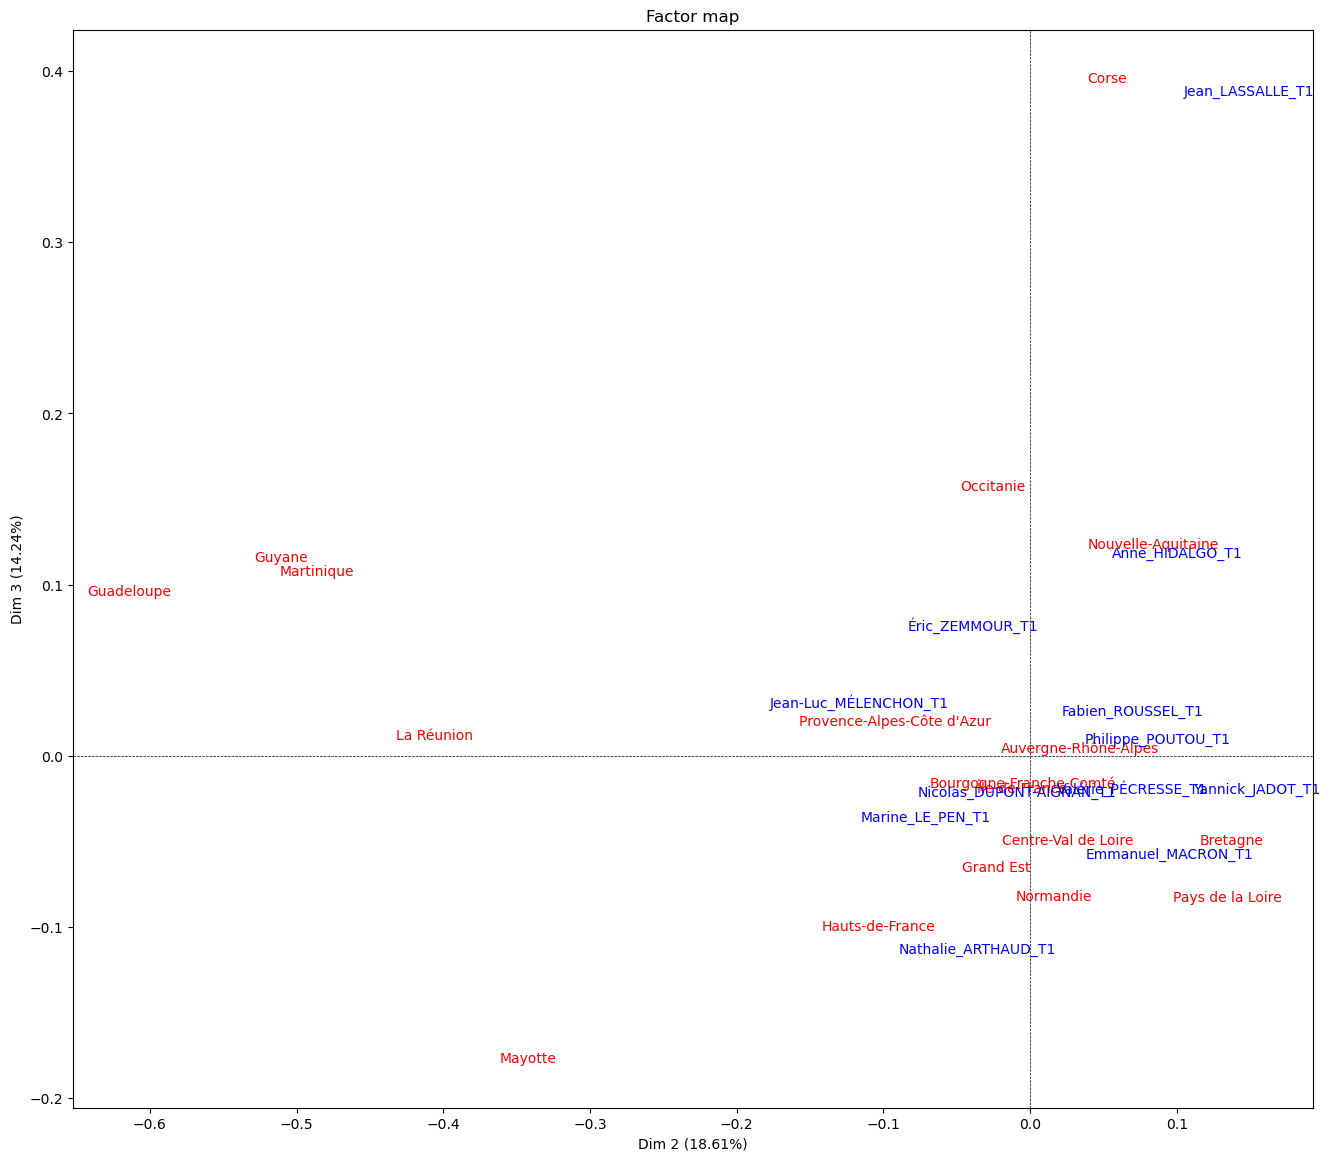

In [32]:
AFC.mapping(2, 3,figsize=(16,14))

Interprétation : L'étude de l'axe 3 avec les axes 1 et 2 ne nous donne pas vraiment d'informations pertinentes en plus par rapport à ce qu'on a déjà, mise a part le lien très fort entre Jean Lasalle et la Corse.

Partie 3 : Classification Ascendante Hiérarchique (CAH)

In [24]:
## Normalisation des données
from sklearn.preprocessing import StandardScaler

# Classification CAH
from scipy.cluster.hierarchy import dendrogram, linkage

# Classification k-means
from sklearn.cluster import KMeans

In [25]:
# Dataframes initiaux :

votes_globaux = pd.read_excel("election_France_2022.xlsx", sheet_name=0, index_col=0)

votesT1 = votes_globaux.iloc[:, 0:12]

votesT2 = votes_globaux.iloc[:, 12:14]

votes_globaux.head(2)

,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1,Emmanuel_MACRON_T2,Marine_LE_PEN_T2
Régions,,,,,,,,,,,,,,
Auvergne-Rhône-Alpes,1174972,312881,96403,136414,897349,98446,30586,224710,77566,943122,23136,217881,2251392,1515717
Bourgogne-Franche-Comté,394119,107057,33932,49557,277901,38691,12738,60235,26543,409643,10643,76655,713977,636161


On utilisera que les données du premier tour. On étudiera donc les douze candidats du premier tour des présidentielles françaises de 2022. Le but de l'analyse par classification ascendante hiérarchique est d'analyser la structure de vote par régions. On cherche donc à croiser des régions (lignes) avec des candidats (colonnes). Autrement dit savoir quelles régions votent majoritairement pour quel candidat. 
Le choix d'une CAH sur le premier tour s'explique simplement par le fait qu'au second tour, il n'y a que 2 candidats.
L'analyse n'a pas beacoup d'intérêt et donne lieu a un vote par "élimination", "barrage". Et agrège des bulletins dont les électeurs ne sont peut-être pas d'accord.

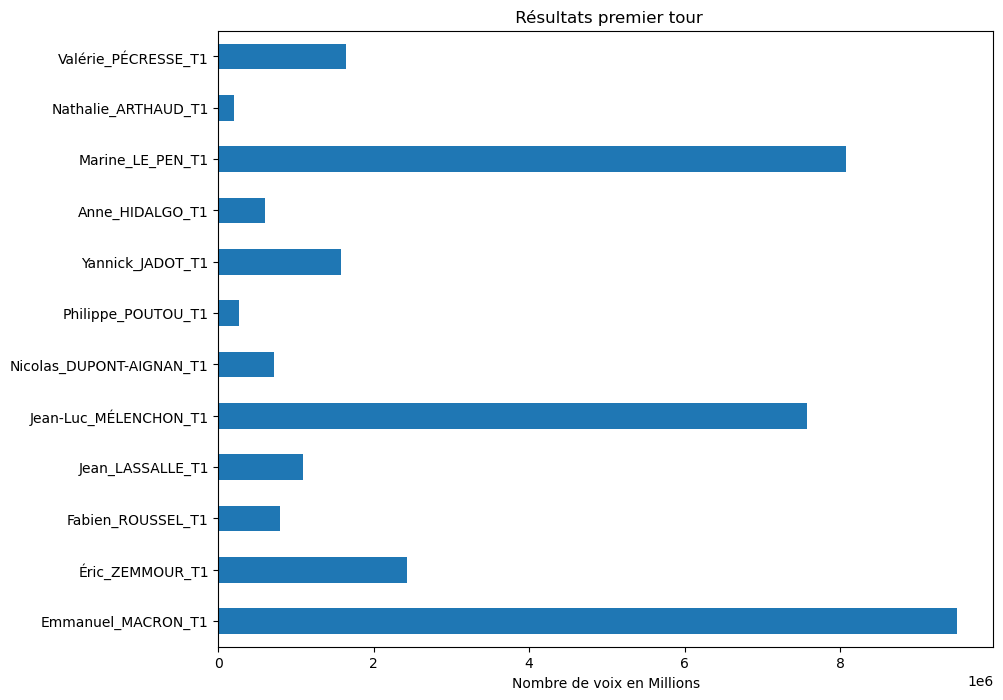

In [26]:
totalT1 = votesT1.sum()
plt.figure(figsize=(10, 8))

totalT1.plot(kind='barh') 

plt.title(" Résultats premier tour")
plt.xlabel("Nombre de voix en Millions")
plt.show()

In [27]:
# Normalisation des données du premier tour
# On divise le nombre de voix obtenus par un candidat dans une région, par le nombre total de suffrages exprimés dans la région.

votes_normal = votesT1.div(votesT1.sum(axis = 1), axis = 0) *100
votes_normal

,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1
Régions,,,,,,,,,,,,
Auvergne-Rhône-Alpes,27.754374,7.390658,2.277165,3.222277,21.196556,2.325423,0.722481,5.307944,1.832210,22.277774,0.546503,5.146634
Bourgogne-Franche-Comté,26.314704,7.148027,2.265586,3.308843,18.555011,2.583337,0.850496,4.021796,1.772234,27.351217,0.710616,5.118133
Bretagne,32.792810,4.914270,2.593997,2.972002,20.649774,1.779361,1.009010,6.191887,2.209050,19.528223,0.656949,4.702668
Centre-Val de Loire,28.533316,6.584165,2.496891,2.873692,18.677176,2.360785,0.834477,4.043863,1.721732,25.856834,0.688039,5.329030
Corse,18.120810,12.794832,3.078604,10.402247,13.366175,1.756779,0.929620,3.247564,1.074152,28.592270,0.308064,6.328882
Grand Est,27.284536,7.168195,1.697478,2.771941,17.625822,2.681630,0.796120,4.007375,1.432880,29.538021,0.667759,4.328243
Guadeloupe,13.426361,2.293371,0.494503,0.764704,56.158715,1.564941,0.527816,1.426509,1.677462,17.917607,0.802458,2.945553
Guyane,14.224366,4.386381,0.685982,1.438889,50.592566,1.999387,1.288308,2.621232,1.491871,17.662642,0.828198,2.780179
Hauts-de-France,25.399007,5.898105,3.115658,2.054192,18.984255,1.820754,0.694461,3.128413,1.341716,33.340127,0.688478,3.534833


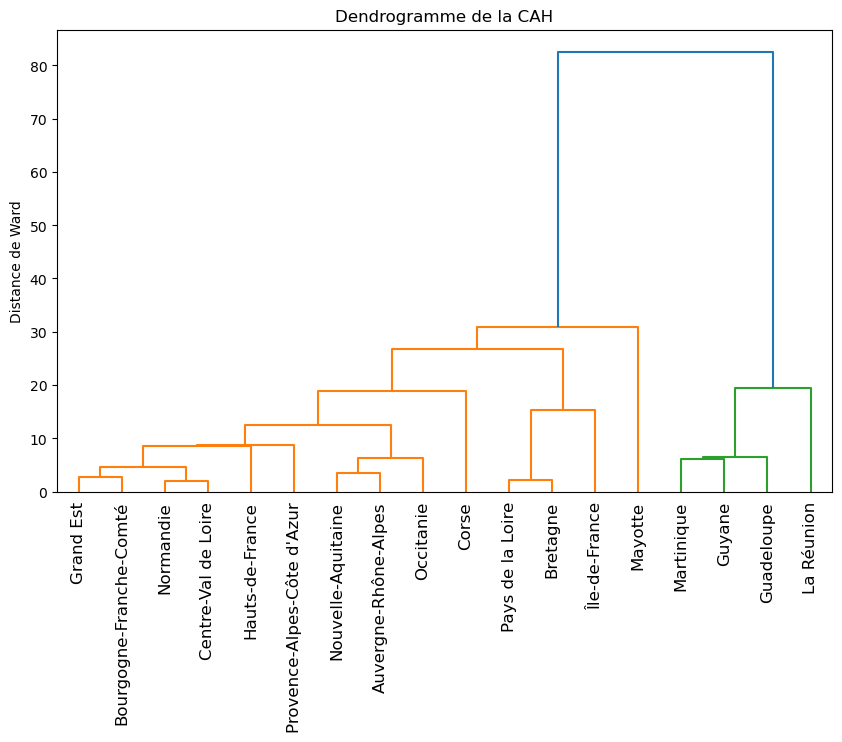

In [28]:
CAH_ward = linkage(votes_normal, method = 'ward')

plt.figure(figsize=(10, 6))
dendrogram(CAH_ward, labels=votes_globaux.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.axhline(y = 700, color='red', linestyle='--')
plt.xticks(rotation=90)
plt.title('Dendrogramme de la CAH')
plt.xticks(rotation=90)
plt.ylabel('Distance de Ward')
plt.show()

C:\Users\yanis\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] Le fichier spécifié est introuvable
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yanis\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\yanis\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yanis\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^

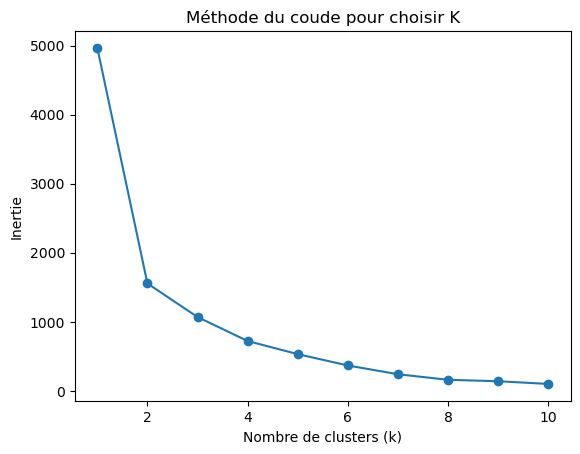

In [29]:
# On utilise la méthode du coude pour déterminer le nombre de cluster

inertie = []
for k in range (1, 11) : # Essayer de 1 à 10 clusters
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(votes_normal)
    inertie.append(kmeans.inertia_)

# Tracer l'inertie en fonction du nbr de clusters
plt.plot(range(1, 11), inertie, marker ='o')
plt.title('Méthode du coude pour choisir K')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie')
plt.show()

C:\Users\yanis\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\yanis\AppData\Local\Temp\ipykernel_19040\540903018.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votesT1['Cluster'] = clusters


Régions
Auvergne-Rhône-Alpes          4233467
Bourgogne-Franche-Comté       1497716
Bretagne                      1973519
Centre-Val de Loire           1345275
Corse                          147374
Grand Est                     2793676
Guadeloupe                     135085
Guyane                          35861
Hauts-de-France               3041928
Île-de-France                 5483975
La Réunion                     346766
Martinique                     122949
Mayotte                         35053
Normandie                     1783467
Nouvelle-Aquitaine            3419974
Occitanie                     3310623
Pays de la Loire              2127444
Provence-Alpes-Côte d'Azur    2652910
dtype: int64


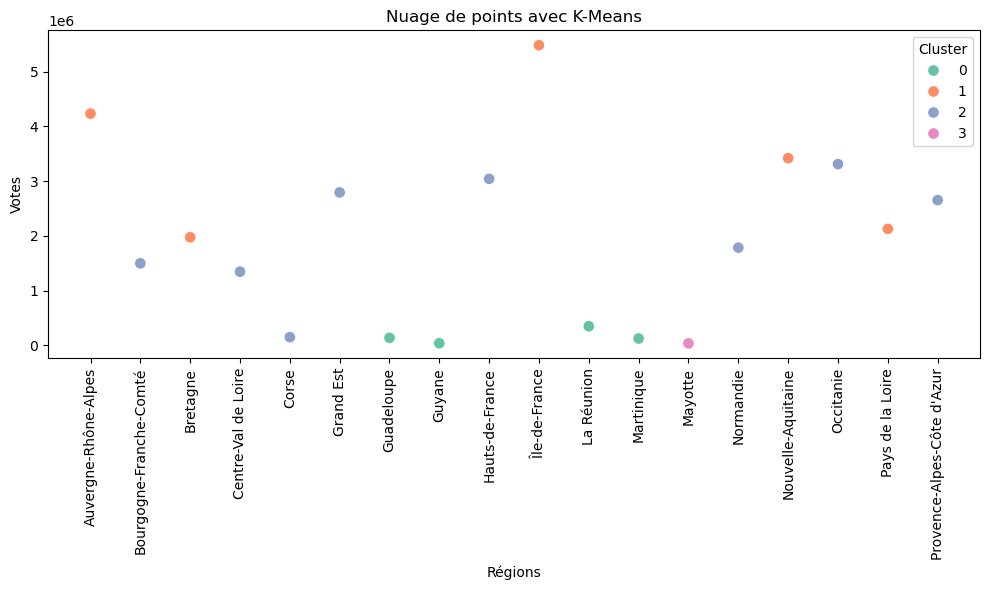

In [30]:
# Le coude se forme en 4, donc on garde 4 clusters.
# De plus cela permet de conserver le cas atypique de Mayotte.
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(votes_normal)


votesT1['Cluster'] = clusters

Total = votesT1.sum(axis =1)
print(Total)

# Visualisation simple du nuage de points
plt.figure(figsize=(10, 6))
sns.scatterplot(data=votesT1, x=votesT1.index, y=Total, hue='Cluster', palette='Set2', s=70)
plt.title('Nuage de points avec K-Means')
plt.xlabel('Régions')
plt.ylabel('Votes')
plt.xticks(rotation=90)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [31]:
votesT1['Cluster'] = clusters
votesT1.groupby('Cluster').mean()

C:\Users\yanis\AppData\Local\Temp\ipykernel_19040\2114243459.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  votesT1['Cluster'] = clusters


,Emmanuel_MACRON_T1,Éric_ZEMMOUR_T1,Fabien_ROUSSEL_T1,Jean_LASSALLE_T1,Jean-Luc_MÉLENCHON_T1,Nicolas_DUPONT-AIGNAN_T1,Philippe_POUTOU_T1,Yannick_JADOT_T1,Anne_HIDALGO_T1,Marine_LE_PEN_T1,Nathalie_ARTHAUD_T1,Valérie_PÉCRESSE_T1
Cluster,,,,,,,,,,,,
0,26455.75,5223.50,1183.750,1888.75,74725.25,3539.50,1214.250,3209.750,3071.25,33200.750,1591.50,4861.250
1,1026187.20,228825.00,78912.400,107745.60,810732.80,66550.60,26917.400,184528.800,64056.20,652340.200,18068.40,182810.200
2,532252.50,158056.25,49848.125,68343.25,402562.75,45666.25,15601.875,80819.375,33624.00,583815.625,12140.25,88888.875
3,5936.00,482.00,206.000,359.00,8398.00,530.00,328.000,295.000,318.00,14958.000,430.00,2810.000


Voir la feuille avec le rapport détaillé !